In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import warnings

%matplotlib inline

/Users/danstechman/anaconda/lib/python3.5/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
figSavePath = '/Users/danstechman/GoogleDrive/School/Research/PECAN/Microphysics/plots/'
fType = 'png'

plotRHall    = False
plotNtAll    = False
plotTWCall   = False
plotDmmAll   = False
plotARall    = False
plotREall    = True
plotRjctRall = True

# Define temp bin interval
binIntvl = 1.0


flights = ['20150617','20150620','20150701','20150702','20150706','20150709']

# tzSprdCol = '#92c83e'
# srSprdCol = '#cb000f'
# arSprdCol = '#41489e'
# tzMcol = '#92c83e'
# srMcol = '#cb000f'
# arMcol = '#41489e'
tzSprdCol = 'darkkhaki'
srSprdCol = 'mediumslateblue'
arSprdCol = 'darkcyan'
tzOutCol = '#5F5B36'
srOutCol = '#3D3477'
arOutCol = '#005757'
tzMcol = 'darkkhaki'
srMcol = 'mediumslateblue'
arMcol = 'darkcyan'

### Import data and assign into MCS zone dictionaries
This is where we could create alternative sorting schemes as well _(i.e., perhaps we only want to sort data from trailing stratiform spirals into these MCS zone dictionaries)_

In [3]:
# Initialize dictionaries to hold each concatenated variable within each of the 3 regions
tz = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
sr = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
ar = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}

for flight in flights:
    cipFile = '/Users/danstechman/GoogleDrive/PECAN-Data/mp-data/' + flight + '/' + flight + '_CIPfit-spirals-10s1sAvg.nc'

    # Pull out any global variables/attributes from the netcdf file
    cipData_root = xr.open_dataset(cipFile)
    sprlZone = str(cipData_root.sprlZone.data,'utf-8')
    mcsType = str(cipData_root.mcsType.data,'utf-8')
    numSprls = len(sprlZone)

    # Loop over each spiral for the current flight
    for ix in np.arange(0,numSprls):
        # Open the group associated with the current spiral
        cipData = xr.open_dataset(cipFile,group='spiral_' + str(ix+1))

        if sprlZone[ix] == 'T':
            tz['tempC'].append(cipData.tempC_10s.data.tolist())
            tz['rh'].append(cipData.rh_10s.data.tolist())
            tz['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            tz['twc'].append(cipData.cipTWC_hybrid_igf.data.tolist())
            tz['Dmm'].append(cipData.cipDmm_hybrid_igf.data.tolist())
            tz['ar'].append(cipData.areaRatio_10s.data.tolist())
            tz['re'].append(cipData.efctvRadius_10s.data.tolist())
            tz['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
        
        if sprlZone[ix] == 'S':
            sr['tempC'].append(cipData.tempC_10s.data.tolist())
            sr['rh'].append(cipData.rh_10s.data.tolist())
            sr['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            sr['twc'].append(cipData.cipTWC_hybrid_igf.data.tolist())
            sr['Dmm'].append(cipData.cipDmm_hybrid_igf.data.tolist())
            sr['ar'].append(cipData.areaRatio_10s.data.tolist())
            sr['re'].append(cipData.efctvRadius_10s.data.tolist())
            sr['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
        
        if sprlZone[ix] == 'A':
            ar['tempC'].append(cipData.tempC_10s.data.tolist())
            ar['rh'].append(cipData.rh_10s.data.tolist())
            ar['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            ar['twc'].append(cipData.cipTWC_hybrid_igf.data.tolist())
            ar['Dmm'].append(cipData.cipDmm_hybrid_igf.data.tolist())
            ar['ar'].append(cipData.areaRatio_10s.data.tolist())
            ar['re'].append(cipData.efctvRadius_10s.data.tolist())
            ar['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())

# Pull out all the data for each variable and place within a single
#    list (the steps above produce nested lists for some reason...)
tz['tempC'] = [i for sublist in tz['tempC'] for i in sublist]
tz['rh'] = [i for sublist in tz['rh'] for i in sublist]
tz['Nt'] = [i for sublist in tz['Nt'] for i in sublist]
tz['twc'] = [i for sublist in tz['twc'] for i in sublist]
tz['Dmm'] = [i for sublist in tz['Dmm'] for i in sublist]
tz['ar'] = [i for sublist in tz['ar'] for i in sublist]
tz['re'] = [i for sublist in tz['re'] for i in sublist]
tz['rjctRatio'] = [i for sublist in tz['rjctRatio'] for i in sublist]

sr['tempC'] = [i for sublist in sr['tempC'] for i in sublist]
sr['rh'] = [i for sublist in sr['rh'] for i in sublist]
sr['Nt'] = [i for sublist in sr['Nt'] for i in sublist]
sr['twc'] = [i for sublist in sr['twc'] for i in sublist]
sr['Dmm'] = [i for sublist in sr['Dmm'] for i in sublist]
sr['ar'] = [i for sublist in sr['ar'] for i in sublist]
sr['re'] = [i for sublist in sr['re'] for i in sublist]
sr['rjctRatio'] = [i for sublist in sr['rjctRatio'] for i in sublist]

ar['tempC'] = [i for sublist in ar['tempC'] for i in sublist]
ar['rh'] = [i for sublist in ar['rh'] for i in sublist]
ar['Nt'] = [i for sublist in ar['Nt'] for i in sublist]
ar['twc'] = [i for sublist in ar['twc'] for i in sublist]
ar['Dmm'] = [i for sublist in ar['Dmm'] for i in sublist]
ar['ar'] = [i for sublist in ar['ar'] for i in sublist]
ar['re'] = [i for sublist in ar['re'] for i in sublist]
ar['rjctRatio'] = [i for sublist in ar['rjctRatio'] for i in sublist]

# Convert the lists in each dictionary to numpy arrays
tz = {key: np.array(val) for key, val in tz.items()}
sr = {key: np.array(val) for key, val in sr.items()}
ar = {key: np.array(val) for key, val in ar.items()}

# Change units as desired for any variables
tz['Dmm'] = tz['Dmm']*10 # Convert from cm to mm
sr['Dmm'] = sr['Dmm']*10
ar['Dmm'] = ar['Dmm']*10

tz['re'] = tz['re']/1000 # Convert from um to mm
sr['re'] = sr['re']/1000
ar['re'] = ar['re']/1000

### Initialize temperature bins and create empty variables for our stats

In [4]:
# Define temperature bin edges and determine bin midpoints
edgeMin = -19.0 - (binIntvl/2.)
edgeMax = 20.5 + (binIntvl/2.)
# edgesTemp = np.arange(-19.25,20.75,0.5)
edgesTemp = np.arange(edgeMin,edgeMax,binIntvl)
bin_mid = (edgesTemp[0:-1] + edgesTemp[1:])/2
numBins = len(edgesTemp)-1

# Determine which bins each of the temperatures correspond to within each MCS region
whichBinTemp_TZ = np.digitize(tz['tempC'],edgesTemp)
whichBinTemp_SR = np.digitize(sr['tempC'],edgesTemp)
whichBinTemp_AR = np.digitize(ar['tempC'],edgesTemp)


# Define arrays filled with NaNs to hold the min/max/mean/quantiles
#    for each variable and at each temperature bin
binRH_min_TZ, binRH_max_TZ, binRH_mean_TZ, binRH_median_TZ, binRH_10pct_TZ, binRH_25pct_TZ, binRH_75pct_TZ, binRH_90pct_TZ, \
binNt_min_TZ, binNt_max_TZ, binNt_mean_TZ, binNt_median_TZ, binNt_10pct_TZ, binNt_25pct_TZ, binNt_75pct_TZ, binNt_90pct_TZ, \
binTWC_min_TZ, binTWC_max_TZ, binTWC_mean_TZ, binTWC_median_TZ, binTWC_10pct_TZ, binTWC_25pct_TZ, binTWC_75pct_TZ, binTWC_90pct_TZ, \
binDmm_min_TZ, binDmm_max_TZ, binDmm_mean_TZ, binDmm_median_TZ, binDmm_10pct_TZ, binDmm_25pct_TZ, binDmm_75pct_TZ, binDmm_90pct_TZ, \
binAR_min_TZ, binAR_max_TZ, binAR_mean_TZ, binAR_median_TZ, binAR_10pct_TZ, binAR_25pct_TZ, binAR_75pct_TZ, binAR_90pct_TZ, \
binRE_min_TZ, binRE_max_TZ, binRE_mean_TZ, binRE_median_TZ, binRE_10pct_TZ, binRE_25pct_TZ, binRE_75pct_TZ, binRE_90pct_TZ, \
binRjcR_min_TZ, binRjcR_max_TZ, binRjcR_mean_TZ, binRjcR_median_TZ, binRjcR_10pct_TZ, binRjcR_25pct_TZ, binRjcR_75pct_TZ, binRjcR_90pct_TZ, \
    = [np.full(numBins,np.nan) for i in range(56)]

binRH_min_SR, binRH_max_SR, binRH_mean_SR, binRH_median_SR, binRH_10pct_SR, binRH_25pct_SR, binRH_75pct_SR, binRH_90pct_SR, \
binNt_min_SR, binNt_max_SR, binNt_mean_SR, binNt_median_SR, binNt_10pct_SR, binNt_25pct_SR, binNt_75pct_SR, binNt_90pct_SR, \
binTWC_min_SR, binTWC_max_SR, binTWC_mean_SR, binTWC_median_SR, binTWC_10pct_SR, binTWC_25pct_SR, binTWC_75pct_SR, binTWC_90pct_SR, \
binDmm_min_SR, binDmm_max_SR, binDmm_mean_SR, binDmm_median_SR, binDmm_10pct_SR, binDmm_25pct_SR, binDmm_75pct_SR, binDmm_90pct_SR, \
binAR_min_SR, binAR_max_SR, binAR_mean_SR, binAR_median_SR, binAR_10pct_SR, binAR_25pct_SR, binAR_75pct_SR, binAR_90pct_SR, \
binRE_min_SR, binRE_max_SR, binRE_mean_SR, binRE_median_SR, binRE_10pct_SR, binRE_25pct_SR, binRE_75pct_SR, binRE_90pct_SR, \
binRjcR_min_SR, binRjcR_max_SR, binRjcR_mean_SR, binRjcR_median_SR, binRjcR_10pct_SR, binRjcR_25pct_SR, binRjcR_75pct_SR, binRjcR_90pct_SR, \
    = [np.full(numBins,np.nan) for i in range(56)]

binRH_min_AR, binRH_max_AR, binRH_mean_AR, binRH_median_AR, binRH_10pct_AR, binRH_25pct_AR, binRH_75pct_AR, binRH_90pct_AR, \
binNt_min_AR, binNt_max_AR, binNt_mean_AR, binNt_median_AR, binNt_10pct_AR, binNt_25pct_AR, binNt_75pct_AR, binNt_90pct_AR, \
binTWC_min_AR, binTWC_max_AR, binTWC_mean_AR, binTWC_median_AR, binTWC_10pct_AR, binTWC_25pct_AR, binTWC_75pct_AR, binTWC_90pct_AR, \
binDmm_min_AR, binDmm_max_AR, binDmm_mean_AR, binDmm_median_AR, binDmm_10pct_AR, binDmm_25pct_AR, binDmm_75pct_AR, binDmm_90pct_AR, \
binAR_min_AR, binAR_max_AR, binAR_mean_AR, binAR_median_AR, binAR_10pct_AR, binAR_25pct_AR, binAR_75pct_AR, binAR_90pct_AR, \
binRE_min_AR, binRE_max_AR, binRE_mean_AR, binRE_median_AR, binRE_10pct_AR, binRE_25pct_AR, binRE_75pct_AR, binRE_90pct_AR, \
binRjcR_min_AR, binRjcR_max_AR, binRjcR_mean_AR, binRjcR_median_AR, binRjcR_10pct_AR, binRjcR_25pct_AR, binRjcR_75pct_AR, binRjcR_90pct_AR, \
    = [np.full(numBins,np.nan) for i in range(56)]

### Bin data by temperature and calculate stats

In [5]:
# Loop through the temperature bins and determine the indices of the
#    temperature variable corresponding to temps within said bin
#    Then, use these indices to refer to the appropriate values in each of
#    our variables of interest.
with warnings.catch_warnings():
    # Many of our variables have temp bins with all NaNs which will 
    #    throw runtime warnings everytime we try to use nan*math functions
    #    Here we just tell python to ignore these specific warnings to unclutter
    #    the output
    warnings.filterwarnings('ignore', 'All-NaN (slice|axis) encountered')
    warnings.filterwarnings('ignore', 'Mean of empty slice')
    for ix in range(0,numBins):
        binMatch_TZ = np.squeeze(np.where(whichBinTemp_TZ == ix))
        binMatch_SR = np.squeeze(np.where(whichBinTemp_SR == ix))
        binMatch_AR = np.squeeze(np.where(whichBinTemp_AR == ix))
        binRH_TZ = tz['rh'][binMatch_TZ]
        binRH_SR = sr['rh'][binMatch_SR]
        binRH_AR = ar['rh'][binMatch_AR]
        binNt_TZ = tz['Nt'][binMatch_TZ]
        binNt_SR = sr['Nt'][binMatch_SR]
        binNt_AR = ar['Nt'][binMatch_AR]
        binTWC_TZ = tz['twc'][binMatch_TZ]
        binTWC_SR = sr['twc'][binMatch_SR]
        binTWC_AR = ar['twc'][binMatch_AR]
        binDmm_TZ = tz['Dmm'][binMatch_TZ]
        binDmm_SR = sr['Dmm'][binMatch_SR]
        binDmm_AR = ar['Dmm'][binMatch_AR]
        binAR_TZ = tz['ar'][binMatch_TZ]
        binAR_SR = sr['ar'][binMatch_SR]
        binAR_AR = ar['ar'][binMatch_AR]
        binRE_TZ = tz['re'][binMatch_TZ]
        binRE_SR = sr['re'][binMatch_SR]
        binRE_AR = ar['re'][binMatch_AR]
        binRjcR_TZ = tz['rjctRatio'][binMatch_TZ]
        binRjcR_SR = sr['rjctRatio'][binMatch_SR]
        binRjcR_AR = ar['rjctRatio'][binMatch_AR]


        if np.any(binMatch_TZ):
            binRH_min_TZ[ix] = np.nanmin(binRH_TZ)
            binRH_max_TZ[ix] = np.nanmax(binRH_TZ)
            binRH_mean_TZ[ix] = np.nanmean(binRH_TZ)
            binRH_median_TZ[ix] = np.nanmedian(binRH_TZ)
            binRH_10pct_TZ[ix] = np.nanpercentile(binRH_TZ,10)
            binRH_25pct_TZ[ix] = np.nanpercentile(binRH_TZ,25)
            binRH_75pct_TZ[ix] = np.nanpercentile(binRH_TZ,75)
            binRH_90pct_TZ[ix] = np.nanpercentile(binRH_TZ,90)

            binNt_min_TZ[ix] = np.nanmin(binNt_TZ)
            binNt_max_TZ[ix] = np.nanmax(binNt_TZ)
            binNt_mean_TZ[ix] = np.nanmean(binNt_TZ)
            binNt_median_TZ[ix] = np.nanmedian(binNt_TZ)
            binNt_10pct_TZ[ix] = np.nanpercentile(binNt_TZ,10)
            binNt_25pct_TZ[ix] = np.nanpercentile(binNt_TZ,25)
            binNt_75pct_TZ[ix] = np.nanpercentile(binNt_TZ,75)
            binNt_90pct_TZ[ix] = np.nanpercentile(binNt_TZ,90)

            binTWC_min_TZ[ix] = np.nanmin(binTWC_TZ)
            binTWC_max_TZ[ix] = np.nanmax(binTWC_TZ)
            binTWC_mean_TZ[ix] = np.nanmean(binTWC_TZ)
            binTWC_median_TZ[ix] = np.nanmedian(binTWC_TZ)
            binTWC_10pct_TZ[ix] = np.nanpercentile(binTWC_TZ,10)
            binTWC_25pct_TZ[ix] = np.nanpercentile(binTWC_TZ,25)
            binTWC_75pct_TZ[ix] = np.nanpercentile(binTWC_TZ,75)
            binTWC_90pct_TZ[ix] = np.nanpercentile(binTWC_TZ,90)

            binDmm_min_TZ[ix] = np.nanmin(binDmm_TZ)
            binDmm_max_TZ[ix] = np.nanmax(binDmm_TZ)
            binDmm_mean_TZ[ix] = np.nanmean(binDmm_TZ)
            binDmm_median_TZ[ix] = np.nanmedian(binDmm_TZ)
            binDmm_10pct_TZ[ix] = np.nanpercentile(binDmm_TZ,10)
            binDmm_25pct_TZ[ix] = np.nanpercentile(binDmm_TZ,25)
            binDmm_75pct_TZ[ix] = np.nanpercentile(binDmm_TZ,75)
            binDmm_90pct_TZ[ix] = np.nanpercentile(binDmm_TZ,90)

            binAR_min_TZ[ix] = np.nanmin(binAR_TZ)
            binAR_max_TZ[ix] = np.nanmax(binAR_TZ)
            binAR_mean_TZ[ix] = np.nanmean(binAR_TZ)
            binAR_median_TZ[ix] = np.nanmedian(binAR_TZ)
            binAR_10pct_TZ[ix] = np.nanpercentile(binAR_TZ,10)
            binAR_25pct_TZ[ix] = np.nanpercentile(binAR_TZ,25)
            binAR_75pct_TZ[ix] = np.nanpercentile(binAR_TZ,75)
            binAR_90pct_TZ[ix] = np.nanpercentile(binAR_TZ,90)

            binRE_min_TZ[ix] = np.nanmin(binRE_TZ)
            binRE_max_TZ[ix] = np.nanmax(binRE_TZ)
            binRE_mean_TZ[ix] = np.nanmean(binRE_TZ)
            binRE_median_TZ[ix] = np.nanmedian(binRE_TZ)
            binRE_10pct_TZ[ix] = np.nanpercentile(binRE_TZ,10)
            binRE_25pct_TZ[ix] = np.nanpercentile(binRE_TZ,25)
            binRE_75pct_TZ[ix] = np.nanpercentile(binRE_TZ,75)
            binRE_90pct_TZ[ix] = np.nanpercentile(binRE_TZ,90)

            binRjcR_min_TZ[ix] = np.nanmin(binRjcR_TZ)
            binRjcR_max_TZ[ix] = np.nanmax(binRjcR_TZ)
            binRjcR_mean_TZ[ix] = np.nanmean(binRjcR_TZ)
            binRjcR_median_TZ[ix] = np.nanmedian(binRjcR_TZ)
            binRjcR_10pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,10)
            binRjcR_25pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,25)
            binRjcR_75pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,75)
            binRjcR_90pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,90)


        if np.any(binMatch_SR):
            binRH_min_SR[ix] = np.nanmin(binRH_SR)
            binRH_max_SR[ix] = np.nanmax(binRH_SR)
            binRH_mean_SR[ix] = np.nanmean(binRH_SR)
            binRH_median_SR[ix] = np.nanmedian(binRH_SR)
            binRH_10pct_SR[ix] = np.nanpercentile(binRH_SR,10)
            binRH_25pct_SR[ix] = np.nanpercentile(binRH_SR,25)
            binRH_75pct_SR[ix] = np.nanpercentile(binRH_SR,75)
            binRH_90pct_SR[ix] = np.nanpercentile(binRH_SR,90)

            binNt_min_SR[ix] = np.nanmin(binNt_SR)
            binNt_max_SR[ix] = np.nanmax(binNt_SR)
            binNt_mean_SR[ix] = np.nanmean(binNt_SR)
            binNt_median_SR[ix] = np.nanmedian(binNt_SR)
            binNt_10pct_SR[ix] = np.nanpercentile(binNt_SR,10)
            binNt_25pct_SR[ix] = np.nanpercentile(binNt_SR,25)
            binNt_75pct_SR[ix] = np.nanpercentile(binNt_SR,75)
            binNt_90pct_SR[ix] = np.nanpercentile(binNt_SR,90)

            binTWC_min_SR[ix] = np.nanmin(binTWC_SR)
            binTWC_max_SR[ix] = np.nanmax(binTWC_SR)
            binTWC_mean_SR[ix] = np.nanmean(binTWC_SR)
            binTWC_median_SR[ix] = np.nanmedian(binTWC_SR)
            binTWC_10pct_SR[ix] = np.nanpercentile(binTWC_SR,10)
            binTWC_25pct_SR[ix] = np.nanpercentile(binTWC_SR,25)
            binTWC_75pct_SR[ix] = np.nanpercentile(binTWC_SR,75)
            binTWC_90pct_SR[ix] = np.nanpercentile(binTWC_SR,90)

            binDmm_min_SR[ix] = np.nanmin(binDmm_SR)
            binDmm_max_SR[ix] = np.nanmax(binDmm_SR)
            binDmm_mean_SR[ix] = np.nanmean(binDmm_SR)
            binDmm_median_SR[ix] = np.nanmedian(binDmm_SR)
            binDmm_10pct_SR[ix] = np.nanpercentile(binDmm_SR,10)
            binDmm_25pct_SR[ix] = np.nanpercentile(binDmm_SR,25)
            binDmm_75pct_SR[ix] = np.nanpercentile(binDmm_SR,75)
            binDmm_90pct_SR[ix] = np.nanpercentile(binDmm_SR,90)

            binAR_min_SR[ix] = np.nanmin(binAR_SR)
            binAR_max_SR[ix] = np.nanmax(binAR_SR)
            binAR_mean_SR[ix] = np.nanmean(binAR_SR)
            binAR_median_SR[ix] = np.nanmedian(binAR_SR)
            binAR_10pct_SR[ix] = np.nanpercentile(binAR_SR,10)
            binAR_25pct_SR[ix] = np.nanpercentile(binAR_SR,25)
            binAR_75pct_SR[ix] = np.nanpercentile(binAR_SR,75)
            binAR_90pct_SR[ix] = np.nanpercentile(binAR_SR,90)

            binRE_min_SR[ix] = np.nanmin(binRE_SR)
            binRE_max_SR[ix] = np.nanmax(binRE_SR)
            binRE_mean_SR[ix] = np.nanmean(binRE_SR)
            binRE_median_SR[ix] = np.nanmedian(binRE_SR)
            binRE_10pct_SR[ix] = np.nanpercentile(binRE_SR,10)
            binRE_25pct_SR[ix] = np.nanpercentile(binRE_SR,25)
            binRE_75pct_SR[ix] = np.nanpercentile(binRE_SR,75)
            binRE_90pct_SR[ix] = np.nanpercentile(binRE_SR,90)

            binRjcR_min_SR[ix] = np.nanmin(binRjcR_SR)
            binRjcR_max_SR[ix] = np.nanmax(binRjcR_SR)
            binRjcR_mean_SR[ix] = np.nanmean(binRjcR_SR)
            binRjcR_median_SR[ix] = np.nanmedian(binRjcR_SR)
            binRjcR_10pct_SR[ix] = np.nanpercentile(binRjcR_SR,10)
            binRjcR_25pct_SR[ix] = np.nanpercentile(binRjcR_SR,25)
            binRjcR_75pct_SR[ix] = np.nanpercentile(binRjcR_SR,75)
            binRjcR_90pct_SR[ix] = np.nanpercentile(binRjcR_SR,90)


        if np.any(binMatch_AR):
            binRH_min_AR[ix] = np.nanmin(binRH_AR)
            binRH_max_AR[ix] = np.nanmax(binRH_AR)
            binRH_mean_AR[ix] = np.nanmean(binRH_AR)
            binRH_median_AR[ix] = np.nanmedian(binRH_AR)
            binRH_10pct_AR[ix] = np.nanpercentile(binRH_AR,10)
            binRH_25pct_AR[ix] = np.nanpercentile(binRH_AR,25)
            binRH_75pct_AR[ix] = np.nanpercentile(binRH_AR,75)
            binRH_90pct_AR[ix] = np.nanpercentile(binRH_AR,90)

            binNt_min_AR[ix] = np.nanmin(binNt_AR)
            binNt_max_AR[ix] = np.nanmax(binNt_AR)
            binNt_mean_AR[ix] = np.nanmean(binNt_AR)
            binNt_median_AR[ix] = np.nanmedian(binNt_AR)
            binNt_10pct_AR[ix] = np.nanpercentile(binNt_AR,10)
            binNt_25pct_AR[ix] = np.nanpercentile(binNt_AR,25)
            binNt_75pct_AR[ix] = np.nanpercentile(binNt_AR,75)
            binNt_90pct_AR[ix] = np.nanpercentile(binNt_AR,90)

            binTWC_min_AR[ix] = np.nanmin(binTWC_AR)
            binTWC_max_AR[ix] = np.nanmax(binTWC_AR)
            binTWC_mean_AR[ix] = np.nanmean(binTWC_AR)
            binTWC_median_AR[ix] = np.nanmedian(binTWC_AR)
            binTWC_10pct_AR[ix] = np.nanpercentile(binTWC_AR,10)
            binTWC_25pct_AR[ix] = np.nanpercentile(binTWC_AR,25)
            binTWC_75pct_AR[ix] = np.nanpercentile(binTWC_AR,75)
            binTWC_90pct_AR[ix] = np.nanpercentile(binTWC_AR,90)

            binDmm_min_AR[ix] = np.nanmin(binDmm_AR)
            binDmm_max_AR[ix] = np.nanmax(binDmm_AR)
            binDmm_mean_AR[ix] = np.nanmean(binDmm_AR)
            binDmm_median_AR[ix] = np.nanmedian(binDmm_AR)
            binDmm_10pct_AR[ix] = np.nanpercentile(binDmm_AR,10)
            binDmm_25pct_AR[ix] = np.nanpercentile(binDmm_AR,25)
            binDmm_75pct_AR[ix] = np.nanpercentile(binDmm_AR,75)
            binDmm_90pct_AR[ix] = np.nanpercentile(binDmm_AR,90)

            binAR_min_AR[ix] = np.nanmin(binAR_AR)
            binAR_max_AR[ix] = np.nanmax(binAR_AR)
            binAR_mean_AR[ix] = np.nanmean(binAR_AR)
            binAR_median_AR[ix] = np.nanmedian(binAR_AR)
            binAR_10pct_AR[ix] = np.nanpercentile(binAR_AR,10)
            binAR_25pct_AR[ix] = np.nanpercentile(binAR_AR,25)
            binAR_75pct_AR[ix] = np.nanpercentile(binAR_AR,75)
            binAR_90pct_AR[ix] = np.nanpercentile(binAR_AR,90)

            binRE_min_AR[ix] = np.nanmin(binRE_AR)
            binRE_max_AR[ix] = np.nanmax(binRE_AR)
            binRE_mean_AR[ix] = np.nanmean(binRE_AR)
            binRE_median_AR[ix] = np.nanmedian(binRE_AR)
            binRE_10pct_AR[ix] = np.nanpercentile(binRE_AR,10)
            binRE_25pct_AR[ix] = np.nanpercentile(binRE_AR,25)
            binRE_75pct_AR[ix] = np.nanpercentile(binRE_AR,75)
            binRE_90pct_AR[ix] = np.nanpercentile(binRE_AR,90)

            binRjcR_min_AR[ix] = np.nanmin(binRjcR_AR)
            binRjcR_max_AR[ix] = np.nanmax(binRjcR_AR)
            binRjcR_mean_AR[ix] = np.nanmean(binRjcR_AR)
            binRjcR_median_AR[ix] = np.nanmedian(binRjcR_AR)
            binRjcR_10pct_AR[ix] = np.nanpercentile(binRjcR_AR,10)
            binRjcR_25pct_AR[ix] = np.nanpercentile(binRjcR_AR,25)
            binRjcR_75pct_AR[ix] = np.nanpercentile(binRjcR_AR,75)
            binRjcR_90pct_AR[ix] = np.nanpercentile(binRjcR_AR,90)

### Remove zeros from some variables' stats
Zero values in some variables such as Nt and TWC (possibly others - need to consider this a bit more) do not provide us any valuable information over just using NaNs. NaNs are preferable for these spread plots because they considerably clean up the output (zeros on log plots will be clipped to a very very small value [essentially zero] producing a large shoot-off in the filled polygon).

In [6]:
# Find all zeros in stats for select variables and replace with NaN
binNt_min_TZ[binNt_min_TZ == 0] = np.nan
binNt_max_TZ[binNt_max_TZ == 0] = np.nan
binNt_mean_TZ[binNt_mean_TZ == 0] = np.nan
binNt_median_TZ[binNt_median_TZ == 0] = np.nan
binNt_10pct_TZ[binNt_10pct_TZ == 0] = np.nan
binNt_25pct_TZ[binNt_25pct_TZ == 0] = np.nan
binNt_75pct_TZ[binNt_75pct_TZ == 0] = np.nan
binNt_90pct_TZ[binNt_90pct_TZ == 0] = np.nan

binNt_min_SR[binNt_min_SR == 0] = np.nan
binNt_max_SR[binNt_max_SR == 0] = np.nan
binNt_mean_SR[binNt_mean_SR == 0] = np.nan
binNt_median_SR[binNt_median_SR == 0] = np.nan
binNt_10pct_SR[binNt_10pct_SR == 0] = np.nan
binNt_25pct_SR[binNt_25pct_SR == 0] = np.nan
binNt_75pct_SR[binNt_75pct_SR == 0] = np.nan
binNt_90pct_SR[binNt_90pct_SR == 0] = np.nan

binNt_min_AR[binNt_min_AR == 0] = np.nan
binNt_max_AR[binNt_max_AR == 0] = np.nan
binNt_mean_AR[binNt_mean_AR == 0] = np.nan
binNt_median_AR[binNt_median_AR == 0] = np.nan
binNt_10pct_AR[binNt_10pct_AR == 0] = np.nan
binNt_25pct_AR[binNt_25pct_AR == 0] = np.nan
binNt_75pct_AR[binNt_75pct_AR == 0] = np.nan
binNt_90pct_AR[binNt_90pct_AR == 0] = np.nan

binTWC_min_TZ[binTWC_min_TZ == 0] = np.nan
binTWC_max_TZ[binTWC_max_TZ == 0] = np.nan
binTWC_mean_TZ[binTWC_mean_TZ == 0] = np.nan
binTWC_median_TZ[binTWC_median_TZ == 0] = np.nan
binTWC_10pct_TZ[binTWC_10pct_TZ == 0] = np.nan
binTWC_25pct_TZ[binTWC_25pct_TZ == 0] = np.nan
binTWC_75pct_TZ[binTWC_75pct_TZ == 0] = np.nan
binTWC_90pct_TZ[binTWC_90pct_TZ == 0] = np.nan

binTWC_min_SR[binTWC_min_SR == 0] = np.nan
binTWC_max_SR[binTWC_max_SR == 0] = np.nan
binTWC_mean_SR[binTWC_mean_SR == 0] = np.nan
binTWC_median_SR[binTWC_median_SR == 0] = np.nan
binTWC_10pct_SR[binTWC_10pct_SR == 0] = np.nan
binTWC_25pct_SR[binTWC_25pct_SR == 0] = np.nan
binTWC_75pct_SR[binTWC_75pct_SR == 0] = np.nan
binTWC_90pct_SR[binTWC_90pct_SR == 0] = np.nan

binTWC_min_AR[binTWC_min_AR == 0] = np.nan
binTWC_max_AR[binTWC_max_AR == 0] = np.nan
binTWC_mean_AR[binTWC_mean_AR == 0] = np.nan
binTWC_median_AR[binTWC_median_AR == 0] = np.nan
binTWC_10pct_AR[binTWC_10pct_AR == 0] = np.nan
binTWC_25pct_AR[binTWC_25pct_AR == 0] = np.nan
binTWC_75pct_AR[binTWC_75pct_AR == 0] = np.nan
binTWC_90pct_AR[binTWC_90pct_AR == 0] = np.nan

### Plotting

In [7]:
if plotRHall:
    fig, ax = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax.fill_betweenx(bin_mid,binRH_25pct_TZ,binRH_75pct_TZ,
                     alpha=0.5,facecolor=tzSprdCol,
                     edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
    ax.fill_betweenx(bin_mid,binRH_25pct_TZ,binRH_75pct_TZ,
                     facecolor='none',linestyle =(0.5,[10,5]),
                     edgecolor=tzOutCol,linewidth=2,zorder=5)
    
    ax.fill_betweenx(bin_mid,binRH_25pct_SR,binRH_75pct_SR,
                     alpha=0.5,facecolor=srSprdCol,
                     edgecolor='none',linewidth=0,label='SR $P_{25-75}$')
    ax.fill_betweenx(bin_mid,binRH_25pct_SR,binRH_75pct_SR,
                     facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                     edgecolor=srOutCol,linewidth=2,zorder=5)
    
    ax.fill_betweenx(bin_mid,binRH_25pct_AR,binRH_75pct_AR,
                     alpha=0.5,facecolor=arSprdCol,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax.fill_betweenx(bin_mid,binRH_25pct_AR,binRH_75pct_AR,
                     facecolor='none',linestyle =(0.5,[20,10]),
                     edgecolor=arOutCol,linewidth=2,zorder=5)
    
    # Plot medians
    ax.plot(binRH_median_TZ,bin_mid,color=tzOutCol,alpha=0.5,linewidth=3,label='TZ Median')
    ax.plot(binRH_median_SR,bin_mid,color=srOutCol,alpha=0.5,linewidth=3,label='SR Median')
    ax.plot(binRH_median_AR,bin_mid,color=arOutCol,alpha=0.5,linewidth=3,label='AR Median')
    
    ax.invert_yaxis()
    ax.legend(loc='upper left',fontsize=18)
    ax.set_xlabel('Relative Humidity (%)',fontsize=24)
    ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.set_title('PECAN - RH - All Spirals',fontsize=26)
    ax.grid()
    # Save the output figure
    saveStr = '{}all_spirals/RH-spread_ALL_25-75.{}'.format(figSavePath,fType)
    fig.savefig(saveStr,bbox_inches='tight')

In [8]:
if plotNtAll:
    fig2, ax2 = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax2.fill_betweenx(bin_mid,binNt_25pct_TZ,binNt_75pct_TZ,
                     alpha=0.5,facecolor=tzSprdCol,
                     edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
    ax2.fill_betweenx(bin_mid,binNt_25pct_TZ,binNt_75pct_TZ,
                     facecolor='none',linestyle =(0.5,[10,5]),
                     edgecolor=tzOutCol,linewidth=2,zorder=5)
    
    ax2.fill_betweenx(bin_mid,binNt_25pct_SR,binNt_75pct_SR,
                     alpha=0.5,facecolor=srSprdCol,
                     edgecolor='none',linewidth=0,label='SR $P_{25-75}$')
    ax2.fill_betweenx(bin_mid,binNt_25pct_SR,binNt_75pct_SR,
                     facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                     edgecolor=srOutCol,linewidth=2,zorder=5)
    
    ax2.fill_betweenx(bin_mid,binNt_25pct_AR,binNt_75pct_AR,
                     alpha=0.5,facecolor=arSprdCol,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax2.fill_betweenx(bin_mid,binNt_25pct_AR,binNt_75pct_AR,
                     facecolor='none',linestyle =(0.5,[20,10]),
                     edgecolor=arOutCol,linewidth=2,zorder=5)
    
    # Plot medians
    ax2.plot(binNt_median_TZ,bin_mid,color=tzOutCol,alpha=0.5,linewidth=3,label='TZ Median')
    ax2.plot(binNt_median_SR,bin_mid,color=srOutCol,alpha=0.5,linewidth=3,label='SR Median')
    ax2.plot(binNt_median_AR,bin_mid,color=arOutCol,alpha=0.5,linewidth=3,label='AR Median')
    
    ax2.invert_yaxis()
    ax2.set_xscale('log',nonposx='mask')
    ax2.legend(loc='upper left',fontsize=18)
    ax2.set_xlabel('Total Number Concentration ($cm^{-3}$)',fontsize=24)
    ax2.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax2.tick_params(axis='both', which='major', labelsize=22)
    ax2.set_title('PECAN - Nt - All Spirals',fontsize=26)
    ax2.grid()
    # Save the output figure
    saveStr2 = '{}all_spirals/Nt-spread_ALL_25-75.{}'.format(figSavePath,fType)
    fig2.savefig(saveStr2,bbox_inches='tight')

In [9]:
if plotTWCall:
    fig3, ax3 = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax3.fill_betweenx(bin_mid,binTWC_25pct_TZ,binTWC_75pct_TZ,
                     alpha=0.5,facecolor=tzSprdCol,
                     edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
    ax3.fill_betweenx(bin_mid,binTWC_25pct_TZ,binTWC_75pct_TZ,
                     facecolor='none',linestyle =(0.5,[10,5]),
                     edgecolor=tzOutCol,linewidth=2,zorder=5)
    
    ax3.fill_betweenx(bin_mid,binTWC_25pct_SR,binTWC_75pct_SR,
                     alpha=0.5,facecolor=srSprdCol,
                     edgecolor='none',linewidth=0,label='SR $P_{25-75}$')
    ax3.fill_betweenx(bin_mid,binTWC_25pct_SR,binTWC_75pct_SR,
                     facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                     edgecolor=srOutCol,linewidth=2,zorder=5)
    
    ax3.fill_betweenx(bin_mid,binTWC_25pct_AR,binTWC_75pct_AR,
                     alpha=0.5,facecolor=arSprdCol,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax3.fill_betweenx(bin_mid,binTWC_25pct_AR,binTWC_75pct_AR,
                     facecolor='none',linestyle =(0.5,[20,10]),
                     edgecolor=arOutCol,linewidth=2,zorder=5)
    
    # Plot medians
    ax3.plot(binTWC_median_TZ,bin_mid,color=tzOutCol,alpha=0.5,linewidth=3,label='TZ Median')
    ax3.plot(binTWC_median_SR,bin_mid,color=srOutCol,alpha=0.5,linewidth=3,label='SR Median')
    ax3.plot(binTWC_median_AR,bin_mid,color=arOutCol,alpha=0.5,linewidth=3,label='AR Median')
    
    ax3.invert_yaxis()
    ax3.set_xscale('log',nonposx='mask')
    ax3.legend(loc='upper left',fontsize=18)
    ax3.set_xlabel('Total Water Content ($g\ m^{-3}$)',fontsize=24)
    ax3.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax3.tick_params(axis='both', which='major', labelsize=22)
    ax3.set_title('PECAN - TWC - All Spirals',fontsize=26)
    ax3.grid()
    # Save the output figure
    saveStr3 = '{}all_spirals/TWC-spread_ALL_25-75.{}'.format(figSavePath,fType)
    fig3.savefig(saveStr3,bbox_inches='tight')

In [10]:
if plotDmmAll:
    fig4, ax4 = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax4.fill_betweenx(bin_mid,binDmm_25pct_TZ,binDmm_75pct_TZ,
                     alpha=0.5,facecolor=tzSprdCol,
                     edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
    ax4.fill_betweenx(bin_mid,binDmm_25pct_TZ,binDmm_75pct_TZ,
                     facecolor='none',linestyle =(0.5,[10,5]),
                     edgecolor=tzOutCol,linewidth=2,zorder=5)
    
    ax4.fill_betweenx(bin_mid,binDmm_25pct_SR,binDmm_75pct_SR,
                     alpha=0.5,facecolor=srSprdCol,
                     edgecolor='none',linewidth=0,label='SR $P_{25-75}$')
    ax4.fill_betweenx(bin_mid,binDmm_25pct_SR,binDmm_75pct_SR,
                     facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                     edgecolor=srOutCol,linewidth=2,zorder=5)
    
    ax4.fill_betweenx(bin_mid,binDmm_25pct_AR,binDmm_75pct_AR,
                     alpha=0.5,facecolor=arSprdCol,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax4.fill_betweenx(bin_mid,binDmm_25pct_AR,binDmm_75pct_AR,
                     facecolor='none',linestyle =(0.5,[20,10]),
                     edgecolor=arOutCol,linewidth=2,zorder=5)
    
    # Plot medians
    ax4.plot(binDmm_median_TZ,bin_mid,color=tzOutCol,alpha=0.5,linewidth=3,label='TZ Median')
    ax4.plot(binDmm_median_SR,bin_mid,color=srOutCol,alpha=0.5,linewidth=3,label='SR Median')
    ax4.plot(binDmm_median_AR,bin_mid,color=arOutCol,alpha=0.5,linewidth=3,label='AR Median')
    
    ax4.invert_yaxis()
    ax4.legend(loc='upper left',fontsize=18)
    ax4.set_xlabel('Median Mass Diameter (mm)',fontsize=24)
    ax4.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax4.tick_params(axis='both', which='major', labelsize=22)
    ax4.set_title('PECAN - Dmm - All Spirals',fontsize=26)
    ax4.grid()
    # Save the output figure
    saveStr4 = '{}all_spirals/Dmm-spread_ALL_25-75.{}'.format(figSavePath,fType)
    fig4.savefig(saveStr4,bbox_inches='tight')

In [11]:
if plotARall:
    fig5, ax5 = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax5.fill_betweenx(bin_mid,binAR_25pct_TZ,binAR_75pct_TZ,
                     alpha=0.5,facecolor=tzSprdCol,
                     edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
    ax5.fill_betweenx(bin_mid,binAR_25pct_TZ,binAR_75pct_TZ,
                     facecolor='none',linestyle =(0.5,[10,5]),
                     edgecolor=tzOutCol,linewidth=2,zorder=5)
    
    ax5.fill_betweenx(bin_mid,binAR_25pct_SR,binAR_75pct_SR,
                     alpha=0.5,facecolor=srSprdCol,
                     edgecolor='none',linewidth=0,label='SR $P_{25-75}$')
    ax5.fill_betweenx(bin_mid,binAR_25pct_SR,binAR_75pct_SR,
                     facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                     edgecolor=srOutCol,linewidth=2,zorder=5)
    
    ax5.fill_betweenx(bin_mid,binAR_25pct_AR,binAR_75pct_AR,
                     alpha=0.5,facecolor=arSprdCol,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax5.fill_betweenx(bin_mid,binAR_25pct_AR,binAR_75pct_AR,
                     facecolor='none',linestyle =(0.5,[20,10]),
                     edgecolor=arOutCol,linewidth=2,zorder=5)
    
    # Plot medians
    ax5.plot(binAR_median_TZ,bin_mid,color=tzOutCol,alpha=0.5,linewidth=3,label='TZ Median')
    ax5.plot(binAR_median_SR,bin_mid,color=srOutCol,alpha=0.5,linewidth=3,label='SR Median')
    ax5.plot(binAR_median_AR,bin_mid,color=arOutCol,alpha=0.5,linewidth=3,label='AR Median')
    
    ax5.invert_yaxis()
    ax5.legend(loc='upper left',fontsize=18)
    ax5.set_xlabel('Area Ratio (%)',fontsize=24)
    ax5.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax5.tick_params(axis='both', which='major', labelsize=22)
    ax5.set_title('PECAN - Area Ratio - All Spirals',fontsize=26)
    ax5.grid()
    # Save the output figure
    saveStr5 = '{}all_spirals/AR-spread_ALL_25-75.{}'.format(figSavePath,fType)
    fig5.savefig(saveStr5,bbox_inches='tight')

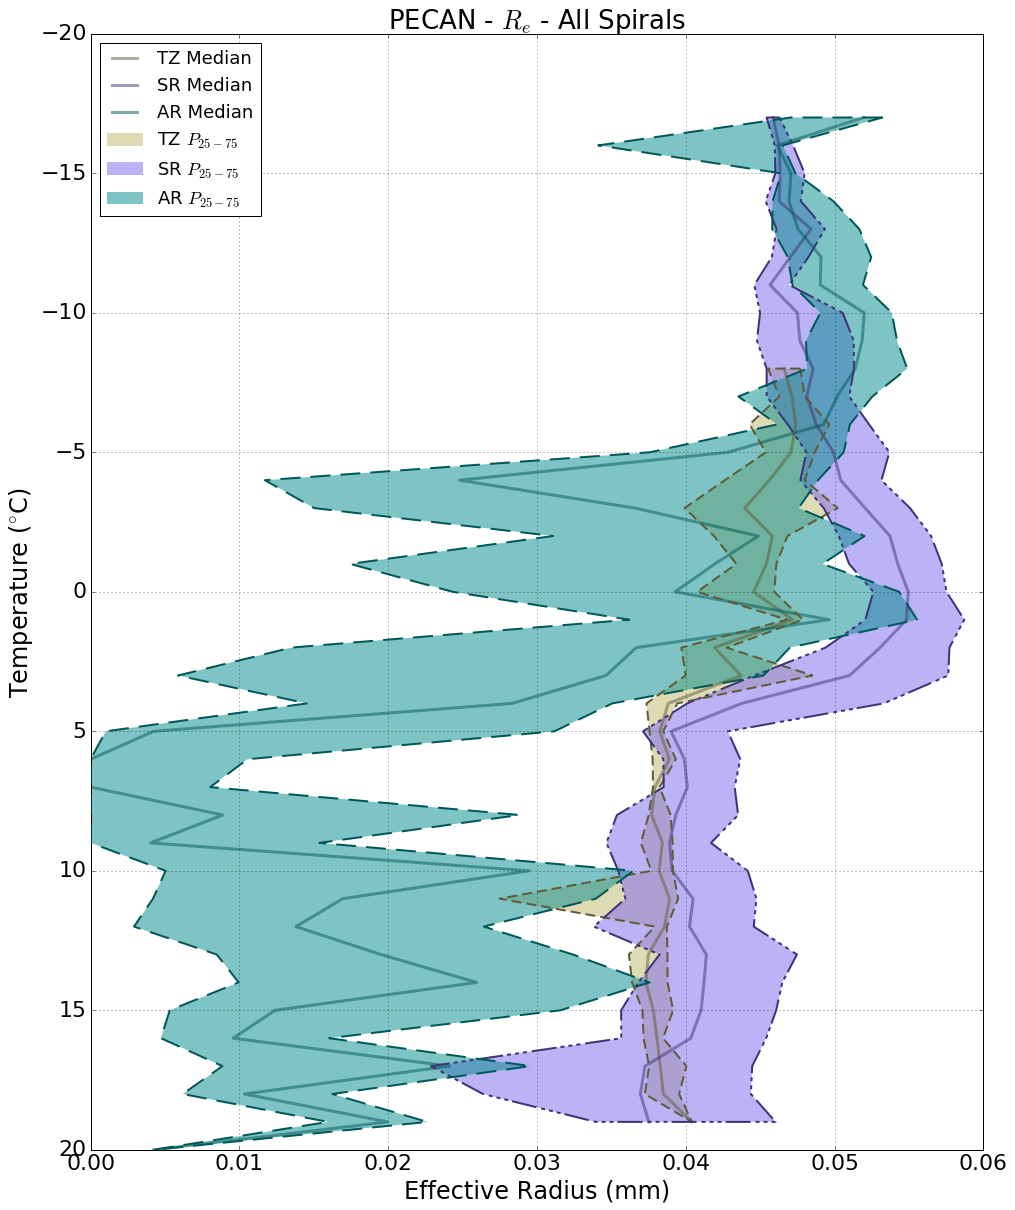

In [12]:
if plotREall:
    fig6, ax6 = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax6.fill_betweenx(bin_mid,binRE_25pct_TZ,binRE_75pct_TZ,
                     alpha=0.5,facecolor=tzSprdCol,
                     edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
    ax6.fill_betweenx(bin_mid,binRE_25pct_TZ,binRE_75pct_TZ,
                     facecolor='none',linestyle =(0.5,[10,5]),
                     edgecolor=tzOutCol,linewidth=2,zorder=5)
    
    ax6.fill_betweenx(bin_mid,binRE_25pct_SR,binRE_75pct_SR,
                     alpha=0.5,facecolor=srSprdCol,
                     edgecolor='none',linewidth=0,label='SR $P_{25-75}$')
    ax6.fill_betweenx(bin_mid,binRE_25pct_SR,binRE_75pct_SR,
                     facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                     edgecolor=srOutCol,linewidth=2,zorder=5)
    
    ax6.fill_betweenx(bin_mid,binRE_25pct_AR,binRE_75pct_AR,
                     alpha=0.5,facecolor=arSprdCol,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax6.fill_betweenx(bin_mid,binRE_25pct_AR,binRE_75pct_AR,
                     facecolor='none',linestyle =(0.5,[20,10]),
                     edgecolor=arOutCol,linewidth=2,zorder=5)
    
    # Plot medians
    ax6.plot(binRE_median_TZ,bin_mid,color=tzOutCol,alpha=0.5,linewidth=3,label='TZ Median')
    ax6.plot(binRE_median_SR,bin_mid,color=srOutCol,alpha=0.5,linewidth=3,label='SR Median')
    ax6.plot(binRE_median_AR,bin_mid,color=arOutCol,alpha=0.5,linewidth=3,label='AR Median')
    
    ax6.invert_yaxis()
    ax6.legend(loc='upper left',fontsize=18)
    ax6.set_xlabel('Effective Radius (mm)',fontsize=24)
    ax6.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax6.tick_params(axis='both', which='major', labelsize=22)
    ax6.set_title('PECAN - $R_e$ - All Spirals',fontsize=26)
    ax6.grid()
    # Save the output figure
    saveStr6 = '{}all_spirals/RE-spread_ALL_25-75.{}'.format(figSavePath,fType)
    fig6.savefig(saveStr6,bbox_inches='tight')

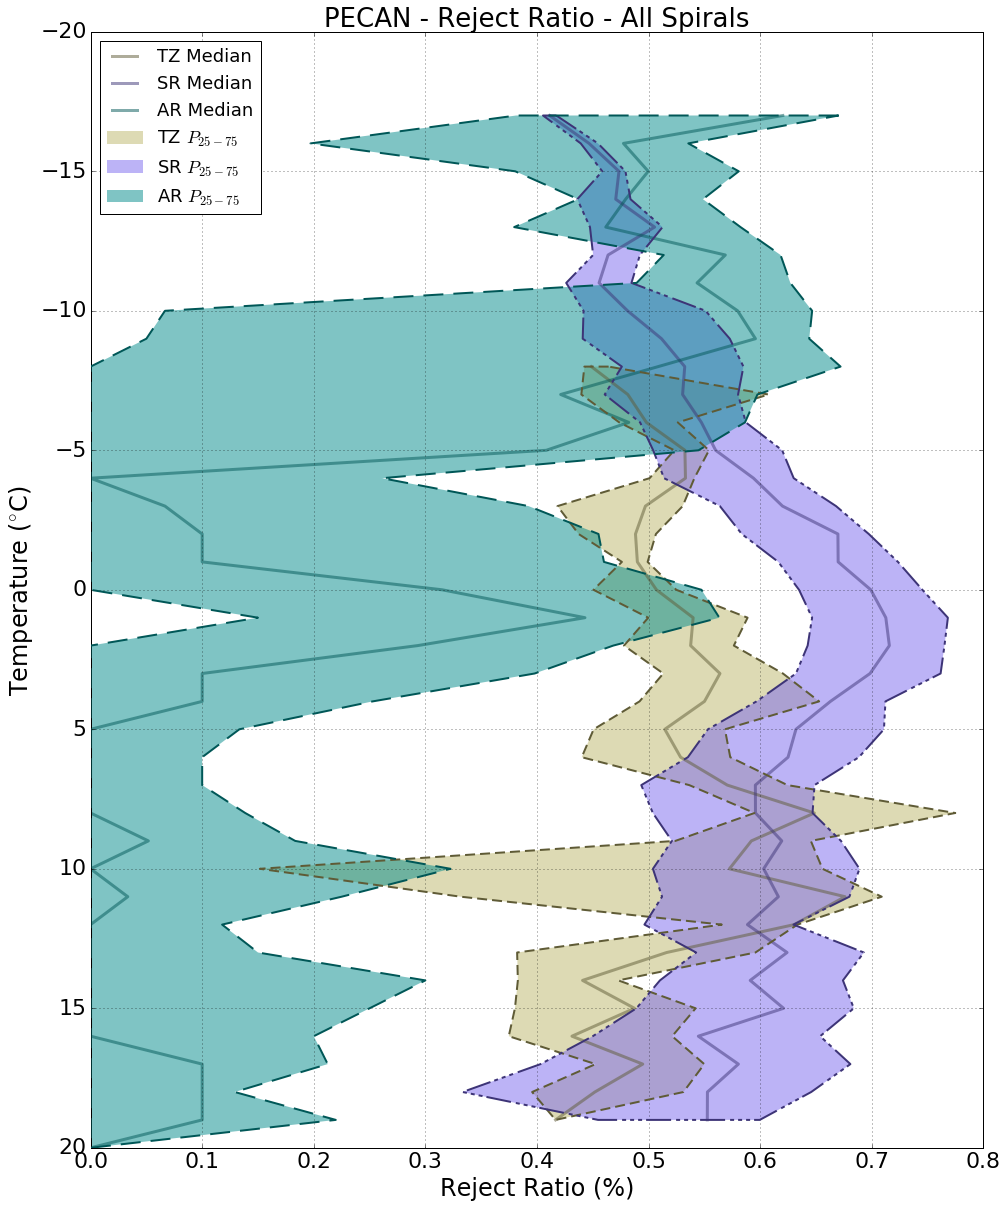

In [14]:
if plotRjctRall:
    fig7, ax7 = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_TZ,binRjcR_75pct_TZ,
                     alpha=0.5,facecolor=tzSprdCol,
                     edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_TZ,binRjcR_75pct_TZ,
                     facecolor='none',linestyle =(0.5,[10,5]),
                     edgecolor=tzOutCol,linewidth=2,zorder=5)
    
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_SR,binRjcR_75pct_SR,
                     alpha=0.5,facecolor=srSprdCol,
                     edgecolor='none',linewidth=0,label='SR $P_{25-75}$')
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_SR,binRjcR_75pct_SR,
                     facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                     edgecolor=srOutCol,linewidth=2,zorder=5)
    
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_AR,binRjcR_75pct_AR,
                     alpha=0.5,facecolor=arSprdCol,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_AR,binRjcR_75pct_AR,
                     facecolor='none',linestyle =(0.5,[20,10]),
                     edgecolor=arOutCol,linewidth=2,zorder=5)
    
    # Plot medians
    ax7.plot(binRjcR_median_TZ,bin_mid,color=tzOutCol,alpha=0.5,linewidth=3,label='TZ Median')
    ax7.plot(binRjcR_median_SR,bin_mid,color=srOutCol,alpha=0.5,linewidth=3,label='SR Median')
    ax7.plot(binRjcR_median_AR,bin_mid,color=arOutCol,alpha=0.5,linewidth=3,label='AR Median')
    
    ax7.invert_yaxis()
    ax7.legend(loc='upper left',fontsize=18)
    ax7.set_xlabel('Reject Ratio (%)',fontsize=24)
    ax7.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax7.tick_params(axis='both', which='major', labelsize=22)
    ax7.set_title('PECAN - Reject Ratio - All Spirals',fontsize=26)
    ax7.grid()
    # Save the output figure
    saveStr7 = '{}all_spirals/RjcR-spread_ALL_25-75.{}'.format(figSavePath,fType)
    fig7.savefig(saveStr7,bbox_inches='tight')